# Anistropic Diffusion
Sean Wade

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
from matplotlib import cm, pyplot as plt
from scipy.misc import imread, imsave
from pylab import rcParams
import seaborn as sns
from __future__ import division, print_function

In [3]:
sns.set_style('white')
#rcParams['figure.figsize'] = 10, 10

## Problem 1

In [15]:
sig = .1
lmbda = .25
N = [5,  20, 100]
g = lambda x: np.exp(-(x/sig)**2)

In [16]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    for i in range(N):
        U_cp = U.copy()
        Nnew, Snew = U_cp[:-1,:], U_cp[1:,:]
        Enew, Wnew = U_cp[:,:-1], U_cp[:,1:]
        U[1:,:] += lmbda * g(np.abs(Nnew-Snew)) * (Nnew-Snew)
        U[:-1,:] += lmbda * g(np.abs(Snew-Nnew)) * (Snew-Nnew)
        U[:,:-1] += lmbda * g(np.abs(Wnew-Enew)) * (Wnew-Enew)
        U[:,1:] += lmbdam* g(np.abs(Enew-Wnew)) * (Enew-Wnew)
    return U

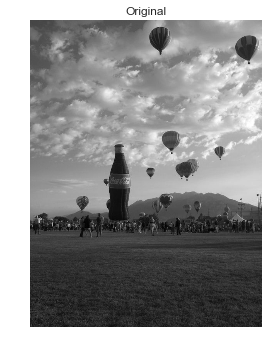

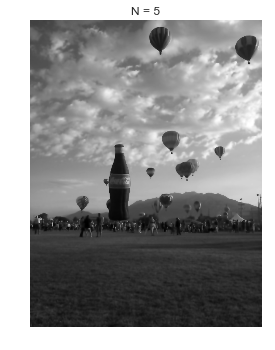

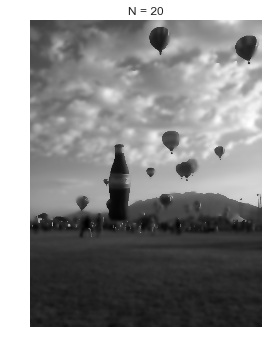

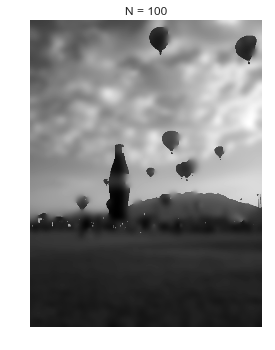

In [17]:
picture = imread('images/balloon.jpg', flatten=True) * 1./255
plt.axis('off')
plt.title("Original")
plt.imshow(picture, cmap=cm.gray)
plt.show()

for n in N:
    U = anisdiff_bw(picture, n, lambda_, g)
    plt.axis('off')
    plt.title("N = %d" % n)
    plt.imshow(U, cmap=cm.gray)
    plt.show()

## Problem 2

In [18]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    for i in range(N):
        U_cp = U.copy()
        Nnew, Snew = U_cp[:-1,:,:], U_cp[1:,:,:]
        Enew, Wnew = U_cp[:,:-1,:], U_cp[:,1:,:]
        U[1:,:,:] += lmbda * g((np.sqrt(np.sum(Nnew**2, axis=2, keepdims=True))-np.sqrt(np.sum(Snew**2, axis=2, keepdims=True)))) * (Nnew-Snew)
        U[:-1,:,:] += lmbda * g((np.sqrt(np.sum(Snew**2, axis=2, keepdims=True))-np.sqrt(np.sum(Nnew**2, axis=2, keepdims=True)))) * (Snew-Nnew)
        U[:,:-1,:] += lmbda * g((np.sqrt(np.sum(Wnew**2, axis=2, keepdims=True))-np.sqrt(np.sum(Enew**2, axis=2, keepdims=True)))) * (Wnew-Enew)
        U[:,1:,:] += lmbda * g((np.sqrt(np.sum(Enew**2, axis=2, keepdims=True))-np.sqrt(np.sum(Wnew**2, axis=2, keepdims=True)))) * (Enew-Wnew)
    return U

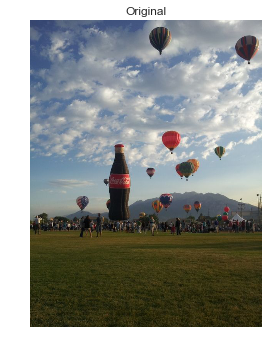

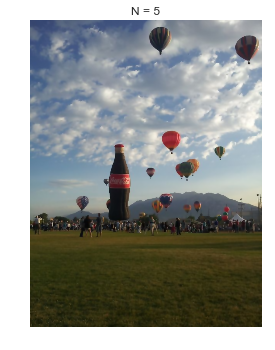

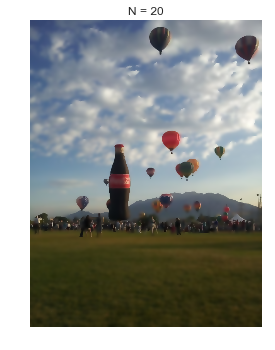

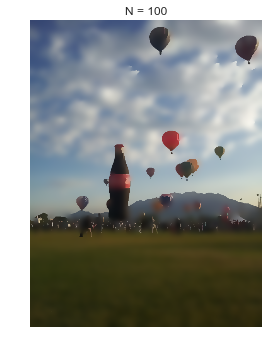

In [19]:
picture = imread('images/balloon.jpg') * 1./255
plt.axis('off')
plt.title("Original")
plt.imshow(picture)
plt.show()

for n in N:
    U = anisdiff_color(picture, n, lambda_, g)
    plt.axis('off')
    plt.title("N = %d" % n)
    plt.imshow(U, cmap=cm.gray)
    plt.show()

## Problem 3

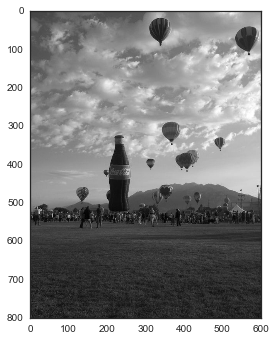

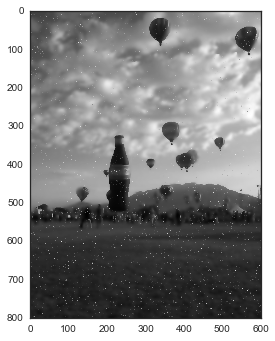

In [22]:
picture = imread('images/balloon.jpg', flatten=True) * 1./255
plt.imshow(picture, cmap=cm.gray)
plt.show()

image = imread('images/balloon.jpg', flatten=True)
x, y = image.shape
for i in xrange(x*y//100):
    image[np.random.randint(x),np.random.randint(y)] = 127 + np.random.randint(127)
    
U = anisdiff_bw(image * 1./255, 20, lambda_, g)
plt.imshow(U, cmap=cm.gray)
plt.show()

The diffusion dosn't work with the noise because there are drastic changes between the colors.  This abrupt change causes it to fail.